<a href="https://colab.research.google.com/github/Bkosky/test/blob/main/docs/examples/sam3_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAM3 Image Segmentation for Remote Sensing

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/sam3_image_segmentation.ipynb)

This notebook demonstrates how to use the Segment Anything Model 3 (SAM3) for segmenting remote sensing images using the `samgeo3` module.

## Installation

First, make sure you have the required dependencies installed:

In [2]:
 %pip install "segment-geospatial[samgeo3]"

## Import Libraries


In [3]:
import leafmap
from samgeo import SamGeo3, download_file

To use SamGeo 2, install it as:
	pip install segment-geospatial[samgeo2]


## Download Sample Data

Let's download a sample satellite image covering the University of California, Berkeley, for testing:


In [2]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/buildings_africa.tif"
image_path = download_file(url)

NameError: name 'download_file' is not defined

In [56]:
m = leafmap.Map()
m.add_raster(image_path, layer_name="Satellite image")
m

Map(center=[-26.1864, 28.1845], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [48]:
m.user_roi_bounds()

[-115.3273, 36.3092, -115.327, 36.3094]

## Request access to SAM3

To use SAM3, you need to request access by filling out this form on Hugging Face: https://huggingface.co/facebook/sam3

Once you have access, uncomment the following code block and run it.

In [59]:
from huggingface_hub import login
login()

## Initialize SAM3

When initializing SAM3, you can choose the backend from "meta", or "transformers".

In [60]:
sam3 = SamGeo3(backend="meta", device=None, checkpoint_path=None, load_from_HF=True)

Using cuda device and meta backend


KeyboardInterrupt: 

## Set the image

You can set the image by either passing the image path or the image URL.

In [61]:
sam3.set_image(image_path)

## Generate masks with text prompt

In [64]:
sam3.generate_masks(prompt="orange roof")

Found 58 objects.


## Show the results

In [1]:
sam3.show_anns()

NameError: name 'sam3' is not defined

![annotation](https://github.com/user-attachments/assets/64323223-35a2-4e03-9cee-1b60fa0c12af)

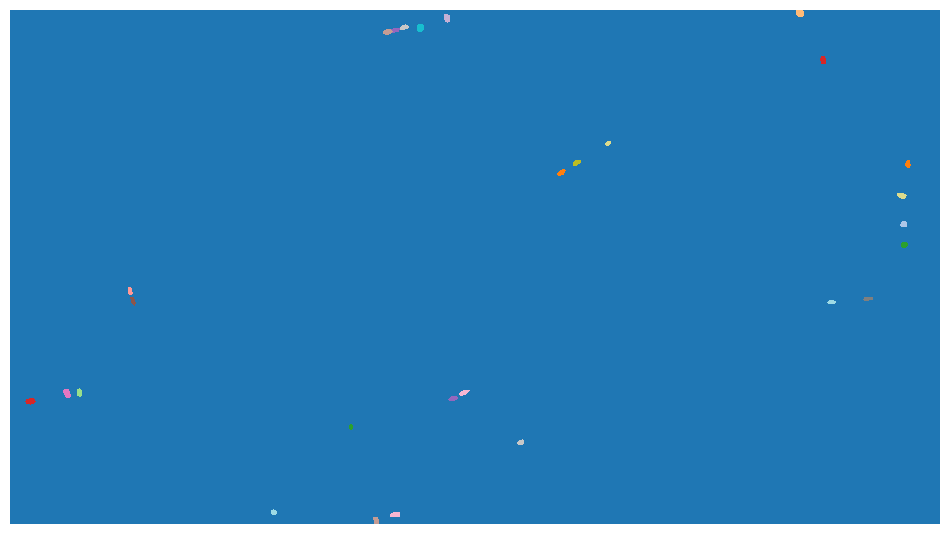

In [18]:
sam3.show_masks()

## Generate masks by bounding boxes

In [49]:
# Define boxes in [xmin, ymin, xmax, ymax] format
boxes = [[-115.3273, 36.3092, -115.327, 36.3094]]

# Optional: specify which boxes are positive/negative prompts
box_labels = [True]  # True=include, False=exclude

# Generate masks
sam3.generate_masks_by_boxes(boxes, box_labels, box_crs="EPSG:4326")

Found 4 objects.


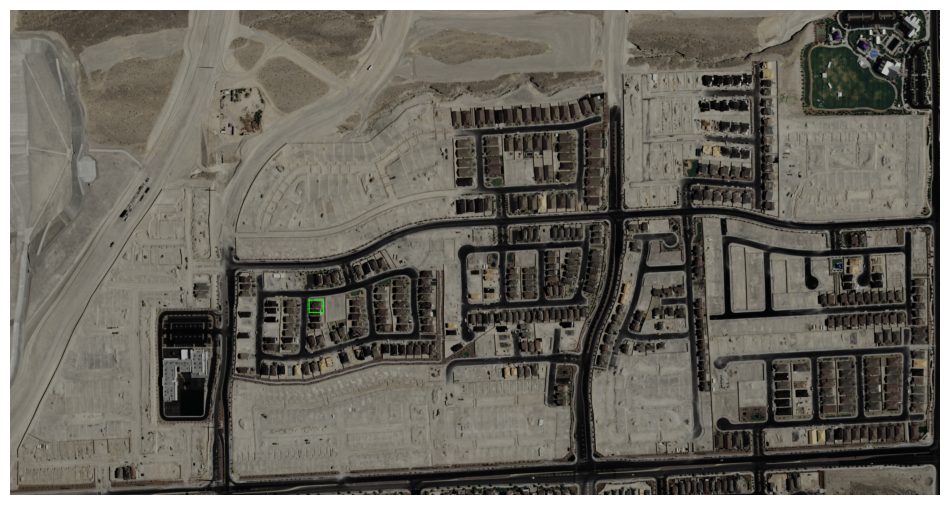

In [50]:
sam3.show_boxes(boxes, box_labels, box_crs="EPSG:4326")

![bbox](https://github.com/user-attachments/assets/87f0b9ab-a621-4e08-a4de-c90cbf0bf32f)

## Show the results

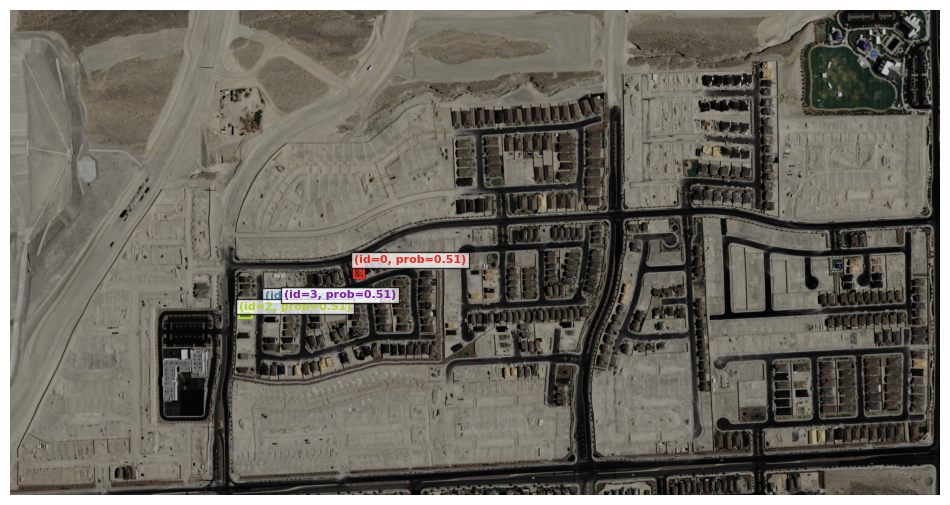

In [51]:
sam3.show_anns()

## Save Masks

Save the generated masks to a file. If the input is a GeoTIFF, the output will be a GeoTIFF with the same georeferencing. Otherwise, it will be saved as PNG.

In [ ]:
# Save masks with unique values for each object
# Since satellite.tif is a GeoTIFF, the output will also be a GeoTIFF
sam3.save_masks(output="building_masks.tif", unique=True)

In [ ]:
# Save as binary mask (all foreground pixels are 255)
sam3.save_masks(output="building_masks_binary.tif", unique=False)

## Save Masks with Confidence Scores

You can also save the confidence scores for each mask. The scores indicate the model's confidence for each predicted mask.

In [ ]:
# Save masks and confidence scores
# Each pixel in the scores image will have the confidence value of its mask
sam3.save_masks(
    output="building_masks_with_scores.tif",
    save_scores="building_scores.tif",
    unique=True,
)

In [ ]:
sam3.show_masks(cmap="coolwarm")

![scores](https://github.com/user-attachments/assets/23ec9b07-0de9-4f72-81b2-83a3c499e94e)

### Visualize Confidence Scores

Let's visualize the confidence scores to see which masks have higher confidence:

In [ ]:
m.add_raster("building_masks.tif", layer_name="Building masks", visible=False)
m.add_raster(
    "building_scores.tif",
    layer_name="Building scores",
    cmap="coolwarm",
    opacity=0.8,
    nodata=0,
)
m

![map](https://github.com/user-attachments/assets/fa21320d-b4f3-48f9-a3f2-828f4ed1c567)